In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
def drawImg(img):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use('seaborn')
    plt.title("Image : "+str(img.shape))
    plt.show()

In [18]:
img = cv2.imread('./images/cody2.jpg')
img = cv2.resize(img,(100,100))
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

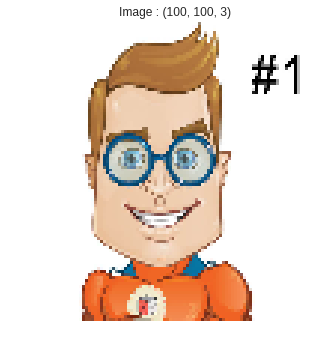

In [19]:
drawImg(img_rgb)

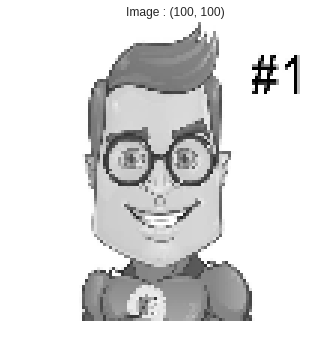

In [20]:
drawImg(img_gray)

In [21]:
def convolution(img,template):
    
    R,C = img.shape
    F = template.shape[0]
    
    new_img = np.zeros((R-F+1,C-F+1))
    
    for row in range(new_img.shape[0]):
        for col in range(new_img.shape[1]):
            
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*template[i][j]
            
            if new_img[row][col]>255:
                new_img[row][col] = 255
                
            elif new_img[row][col]<0:
                new_img[row][col] = 0
    return new_img            

In [22]:
blur_filter = (1/9)*np.ones((3,3))

In [26]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

In [27]:
blurred_image = convolution(img_gray,blur_filter)
edges = convolution(img_gray,edge_filter)

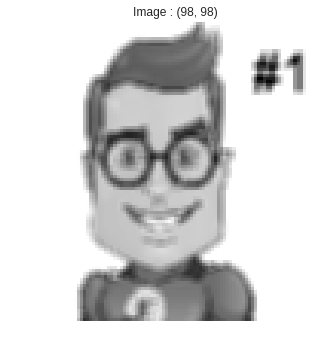

In [28]:
drawImg(blurred_image)

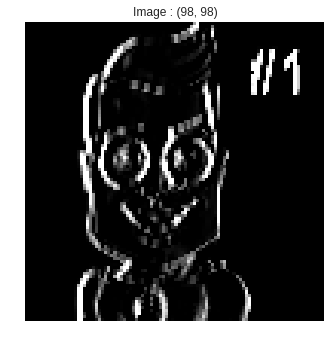

In [29]:
drawImg(edges)

In [30]:
## padding

In [33]:
img_gray2 = np.pad(img_gray,((1,1),(1,1)),'constant',constant_values=100)

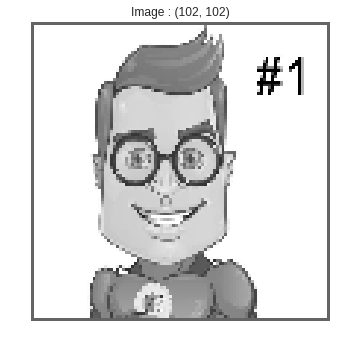

In [34]:
drawImg(img_gray2)

In [37]:
output = convolution(img_gray2,blur_filter)

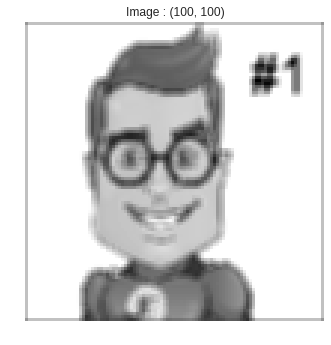

In [38]:
drawImg(output)

In [39]:
## pooling operation

In [48]:
def pooling(X):
    
    R,C = X.shape
    F = 2
    S = 2
    R0 = (R-F)//S + 1
    C0 = (C-F)//S + 1
    
    output = np.zeros((R0,C0))
    
    for r in range(R0):
        for c in range(C0):
            
            r_start=r*S
            r_end=r_start+F
            c_start=c*S
            c_end=c_start+F
            
            output[r][c]=np.max(X[r_start:r_end,c_start:c_end])
            
    return output        

In [49]:
X = np.array([[3,7,11,10],[2,9,2,4],[10,12,3,5],[8,21,6,2]])
max_pooling = pooling(X)

In [50]:
print(max_pooling)

[[ 9. 11.]
 [21.  6.]]
